# Random Forest

### Docente: M.Sc. Richard Fernández 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('D:/Bases/Kaggle/Banco/bank_deposit.csv')

In [3]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra
0,1,261,0,1,1,0,0,0,1
1,2,50,0,1,1,0,0,0,1
2,3,1492,0,1,1,0,0,0,1
3,4,104,0,1,1,0,0,0,1
4,5,13,0,1,1,0,0,0,1


In [4]:
data.dtypes

idcliente    int64
duration     int64
previous     int64
housing      int64
campaign     int64
loan         int64
default      int64
target       int64
muestra      int64
dtype: object

In [5]:
data['housing'] = data['housing'].astype(object)
data['loan'] = data['loan'].astype(object)
data['default'] = data['default'].astype(object)

In [6]:
data.dtypes

idcliente     int64
duration      int64
previous      int64
housing      object
campaign      int64
loan         object
default      object
target        int64
muestra       int64
dtype: object

In [7]:
data['c_housing'] = LabelEncoder().fit_transform(data.housing.values)
data['c_loan'] = LabelEncoder().fit_transform(data.loan.values)
data['c_default'] = LabelEncoder().fit_transform(data.default.values)

In [8]:
data.head(5)

,idcliente,duration,previous,housing,campaign,loan,default,target,muestra,c_housing,c_loan,c_default
0,1,261,0,1,1,0,0,0,1,1,0,0
1,2,50,0,1,1,0,0,0,1,1,0,0
2,3,1492,0,1,1,0,0,0,1,1,0,0
3,4,104,0,1,1,0,0,0,1,1,0,0
4,5,13,0,1,1,0,0,0,1,1,0,0


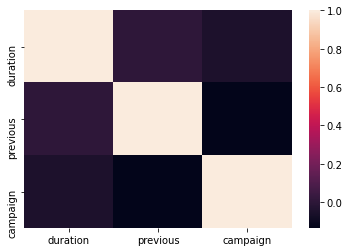

In [9]:
#Heatmap
sns.heatmap(data.loc[:,['duration','previous','campaign']].corr(method = "spearman"))
plt.show()

In [10]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [11]:
data.loc[:,['duration','previous','campaign']].corr(method = "spearman")

,duration,previous,campaign
duration,1.000000,0.007392,-0.045111
previous,0.007392,1.000000,-0.133380
campaign,-0.045111,-0.133380,1.000000


In [12]:
data['target'].dtype

dtype('int64')

In [13]:
data['target'] = data['target'].astype('int64')

In [14]:
data['target'].dtype

dtype('int64')

In [15]:
data.target.value_counts()

0    5289
1    5289
Name: target, dtype: int64

In [16]:
100*data['target'].value_counts(normalize=True)

0    50.0
1    50.0
Name: target, dtype: float64

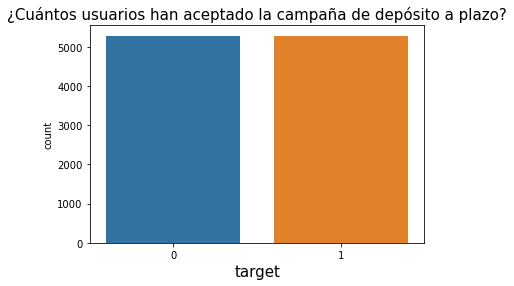

In [17]:
sns.countplot(data = data, x = 'target')
plt.xlabel('target', fontsize = 15)
plt.title('¿Cuántos usuarios han aceptado la campaña de depósito a plazo?', fontsize = 15)
plt.show()

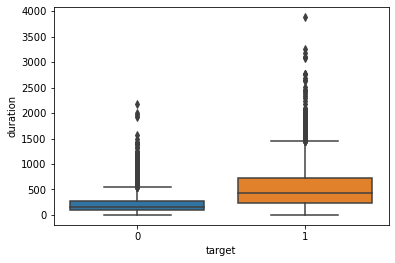

In [18]:
sns.boxplot(x='target',y='duration',data=data)
plt.show()

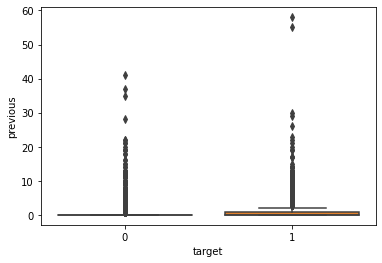

In [19]:
sns.boxplot(x='target',y='previous',data=data)
plt.show()

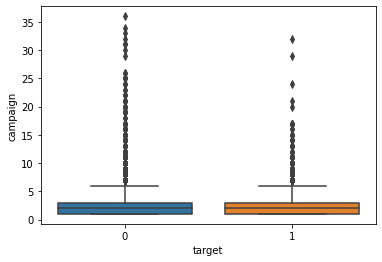

In [20]:
sns.boxplot(x='target',y='campaign',data=data)
plt.show()

housing     0     1
target             
0        2176  3113
1        3354  1935


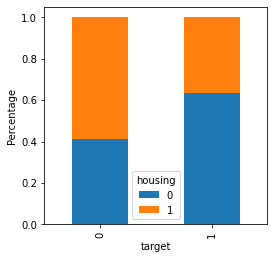

In [21]:
print(pd.crosstab(data["target"],data["housing"]))
t = pd.crosstab(data["target"],data["housing"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

loan       0    1
target           
0       4359  930
1       4805  484


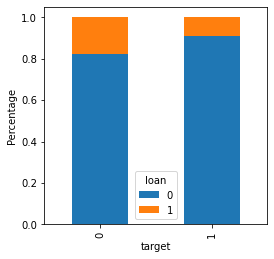

In [22]:
print(pd.crosstab(data["target"],data["loan"]))
t = pd.crosstab(data["target"],data["loan"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

default     0   1
target           
0        5202  87
1        5237  52


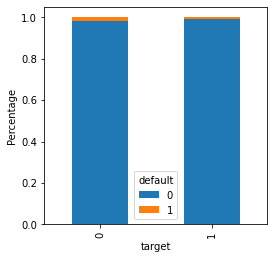

In [23]:
print(pd.crosstab(data["target"],data["default"]))
t = pd.crosstab(data["target"],data["default"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("target")
plt.ylabel("Percentage")
plt.show()

In [24]:
X = data[['c_housing','c_loan','duration']]
y = data['target']

In [25]:
X = X.to_numpy()

In [26]:
X[0:5]

array([[   1,    0,  261],
       [   1,    0,   50],
       [   1,    0, 1492],
       [   1,    0,  104],
       [   1,    0,   13]], dtype=int64)

In [27]:
y = y.to_numpy()

In [28]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [30]:
X_train[0:5]

array([[   1,    0, 1080],
       [   1,    0,  204],
       [   0,    0,  140],
       [   0,    0,  373],
       [   0,    0,  194]], dtype=int64)

In [31]:
X_test[0:5]

array([[  0,   0, 263],
       [  0,   0, 597],
       [  0,   0, 150],
       [  0,   0, 917],
       [  1,   0, 404]], dtype=int64)

In [32]:
X_train_orig = X_train
X_test_orig = X_train

In [33]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [34]:
X_train[0:5]

array([[ 1.05317258, -0.39338138,  2.00876968],
       [ 1.05317258, -0.39338138, -0.50165504],
       [-0.949512  , -0.39338138, -0.68506507],
       [-0.949512  , -0.39338138, -0.01733795],
       [-0.949512  , -0.39338138, -0.53031286]])

In [35]:
X_test[0:5]

array([[-0.97941782, -0.39051946, -0.32766412],
       [-0.97941782, -0.39051946,  0.63785382],
       [-0.97941782, -0.39051946, -0.65432139],
       [-0.97941782, -0.39051946,  1.56290095],
       [ 1.02101471, -0.39051946,  0.07993477]])

In [39]:
#Validación Cruzada
cv_scores = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)

In [40]:
#Accuracy
print(cv_scores)

[0.71234495 0.73479031 0.71394799 0.75       0.72695035]


In [41]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7276067216001363


In [49]:
#Tuning
#n_estimators: Número de árboles
#max_features: Cantidad de variables a considerar al buscar el mejor split
#max_depth: Profundidad del árbol

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [50]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ...max_depth=2, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=2, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=2, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=2, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=2, max_features=auto, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=2, max_features=auto, n_estimators=700; total time=   1.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=700; total time=   1.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=700; total time=   1.6s
[CV] END ...max_depth=2, max_features=auto, n_estimators=700; total time=   1.5s
[CV] END ...max_depth=2, max_features=auto, n_estimators=700; total time=   2.0s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=2)

In [51]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200)


In [52]:
#Random Forest
classifier = RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200).fit(X_train, y_train)

In [53]:
feature_scores = pd.Series(classifier.feature_importances_, index=['housing','loan','duration']).sort_values(ascending=False)
feature_scores

duration    0.828237
housing     0.133349
loan        0.038414
dtype: float64

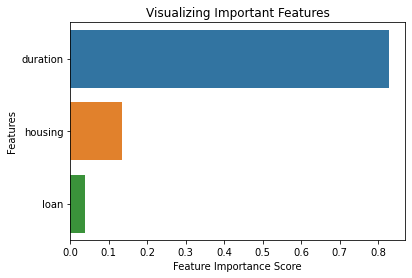

In [54]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
y_pred[0:20]

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [57]:
y_test[0:20]

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1],
      dtype=int64)

In [58]:
confusion_matrix(y_test, y_pred)

array([[796, 233],
       [238, 849]], dtype=int64)

Confusion matrix, without normalization
[[796 233]
 [238 849]]
Normalized confusion matrix
[[0.77356657 0.22643343]
 [0.21895124 0.78104876]]


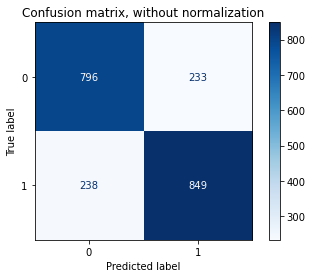

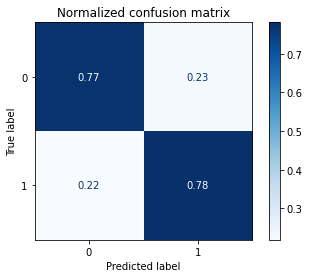

In [59]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [60]:
y_pred_prob = classifier.predict_proba(X_test)

In [61]:
y_pred_prob[0:5]

array([[0.25717601, 0.74282399],
       [0.15392167, 0.84607833],
       [0.59048301, 0.40951699],
       [0.09857896, 0.90142104],
       [0.50057134, 0.49942866]])

In [62]:
y_pred_prob[0:5,1]

array([0.74282399, 0.84607833, 0.40951699, 0.90142104, 0.49942866])

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [64]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.859021674118458

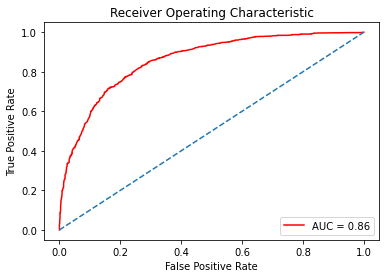

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1029
           1       0.78      0.78      0.78      1087

    accuracy                           0.78      2116
   macro avg       0.78      0.78      0.78      2116
weighted avg       0.78      0.78      0.78      2116



In [67]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [68]:
dataf.head(5)

,0,1,2,0,0,0,1
0,-0.979418,-0.390519,-0.327664,1,1,0.257176,0.742824
1,-0.979418,-0.390519,0.637854,1,1,0.153922,0.846078
2,-0.979418,-0.390519,-0.654321,0,0,0.590483,0.409517
3,-0.979418,-0.390519,1.562901,1,1,0.098579,0.901421
4,1.021015,-0.390519,0.079935,1,0,0.500571,0.499429


In [69]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [70]:
dataf.head(10)

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,-0.979418,-0.390519,-0.327664,1,1,0.257176,0.742824
1,-0.979418,-0.390519,0.637854,1,1,0.153922,0.846078
2,-0.979418,-0.390519,-0.654321,0,0,0.590483,0.409517
3,-0.979418,-0.390519,1.562901,1,1,0.098579,0.901421
4,1.021015,-0.390519,0.079935,1,0,0.500571,0.499429
5,1.021015,-0.390519,-1.015668,0,0,0.983964,0.016036
6,1.021015,-0.390519,1.629389,1,1,0.101296,0.898704
7,-0.979418,-0.390519,-0.905819,0,0,0.932840,0.067160
8,-0.979418,-0.390519,0.603165,0,1,0.156856,0.843144
9,-0.979418,-0.390519,-0.475094,1,1,0.303247,0.696753


In [71]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [72]:
dataf.head(10)

,0,1,2,0,0,0,1
0,1,0,1080,1.0,1.0,0.257176,0.742824
1,1,0,204,1.0,1.0,0.153922,0.846078
2,0,0,140,0.0,0.0,0.590483,0.409517
3,0,0,373,1.0,1.0,0.098579,0.901421
4,0,0,194,1.0,0.0,0.500571,0.499429
5,0,0,387,0.0,0.0,0.983964,0.016036
6,1,1,250,1.0,1.0,0.101296,0.898704
7,0,0,132,0.0,0.0,0.932840,0.067160
8,0,0,305,0.0,1.0,0.156856,0.843144
9,1,0,156,1.0,1.0,0.303247,0.696753


In [73]:
dataf.columns = ['c_housing','c_loan','duration','Target','Target_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']

In [74]:
dataf.head(10)

,c_housing,c_loan,duration,Target,Target_Pred,Target_Pred_Prob_0,Target_Pred_Prob_1
0,1,0,1080,1.0,1.0,0.257176,0.742824
1,1,0,204,1.0,1.0,0.153922,0.846078
2,0,0,140,0.0,0.0,0.590483,0.409517
3,0,0,373,1.0,1.0,0.098579,0.901421
4,0,0,194,1.0,0.0,0.500571,0.499429
5,0,0,387,0.0,0.0,0.983964,0.016036
6,1,1,250,1.0,1.0,0.101296,0.898704
7,0,0,132,0.0,0.0,0.932840,0.067160
8,0,0,305,0.0,1.0,0.156856,0.843144
9,1,0,156,1.0,1.0,0.303247,0.696753


In [75]:
quantiles = dataf['Target_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.181064
0.4    0.353397
0.6    0.702941
0.8    0.800811
Name: Target_Pred_Prob_1, dtype: float64

In [ ]:
dataf.to_csv('D:/dataf.csv', index = False)

In [ ]:
#Tarea
#1. Para la base de datos dataf, crear una variable "score", con las categorías: Muy alto, alto, medio, bajo y muy bajo. 
#Usar: Target_Pred_Prob_1
#2. Proponer estrategias focalizadas para cada segmento